<h1 style="color: #001a79;">Topic 4 - Machine Learning</h1>

<h3 style="color: #001a79;">For this notebook you will need the following packages:</h3>

In [1]:
# Neural networks
import tensorflow as tf

# Neural networks
from tensorflow import keras

# Data import/manipulation
import pandas as pd

# Arrays
import numpy as np

<h3 style="color: #001a79;">Keith Galli - Introduction to Neural Networks in Python (what you need to know) | Tensorflow/Keras</h3>

<hr style="border-top: 1px solid #001a79;" />

There was no specific exercises in this topic so I decided to watch and go through <a href="https://www.youtube.com/watch?v=aBIGJeHRZLQ&ab_channel=KeithGalli" target="_blank">Keith Galli's YouTube video</a>.

## Why use Neural Networks? ## 

Say we have the two plots below. We have red and blue points that we're trying to come build a classifier to automatically classify red and blue dotes correctly. The first example we can simply plot a line between them and get a perfect classification. The second example is slightly more complicated, but we can see that we are able to plot a quadratic curved line between the red and blue dots to classify them. 

<table><tr>
<td> <img src="content/linear.png" alt="Linear" style="width: 350px;"/> </td>
<td> <img src="content/quadratic.png" alt="Quadratic" style="width: 350px;"/> </td>
</tr></table>

Source: <a href="https://stackoverflow.com/a/52030880" target="_blank">Stackoverflow: Two images side by side</a>

However in reality our data is often not as nicely separated as this. Take the example below. There is red and blue dots scattered randomly around the plot with no simple separations. Visually we can draw some lines that would separate the red from blue but training a classifier to automatically do this is not so trivial. Neural networks have the ability to find patterns and groups within the data to pull out meaning. 

<img src="content/classification.PNG" alt="Classification" width="350px"/>

## The Basics ##

Say we are trying to classify the red and blue dots in the last example. Below is what the neural network would look like. 
1. **Input Layer** - All neural networks will start with an input layer. In this case, the input layer would be two-dimensional - the (x, y) co-ordinate of the point we are trying to classify as red or blue. <br><br>
2. **Hidden Layer** - In this case, we have two hidden layers of each of four neurons. 
- Each of the four neurons in the first hidden layer are communicating with the (x,y) input layer through weights. 
- The 2 hidden layers neurons are also all connected - 4 neurons connect to 4 neurons.
- The second layer of 4 neurons are all connected to the two dimensional output layer (red, blue).

3. **Output Layer** - The output layer is the result returned from the input that has passed through the hidden layers. In this case, either red or blue. 

<img src="content/neuralnetwork.PNG" alt="Neural Network" width="350px"/>

At the beginning the neural network is not going to know how to classify the points. It might just draw a line in the data (see image 1) and say everything to the left is blue (0.45 confidence) and to the right is red (0.55 confidence). This won't be accurate but it gives us a starting point. As we input more values the weights update and the separation imporoves and we get more confident predictions (image 2). We hope to eventually get the confidence values as close as possible to the actual value. 

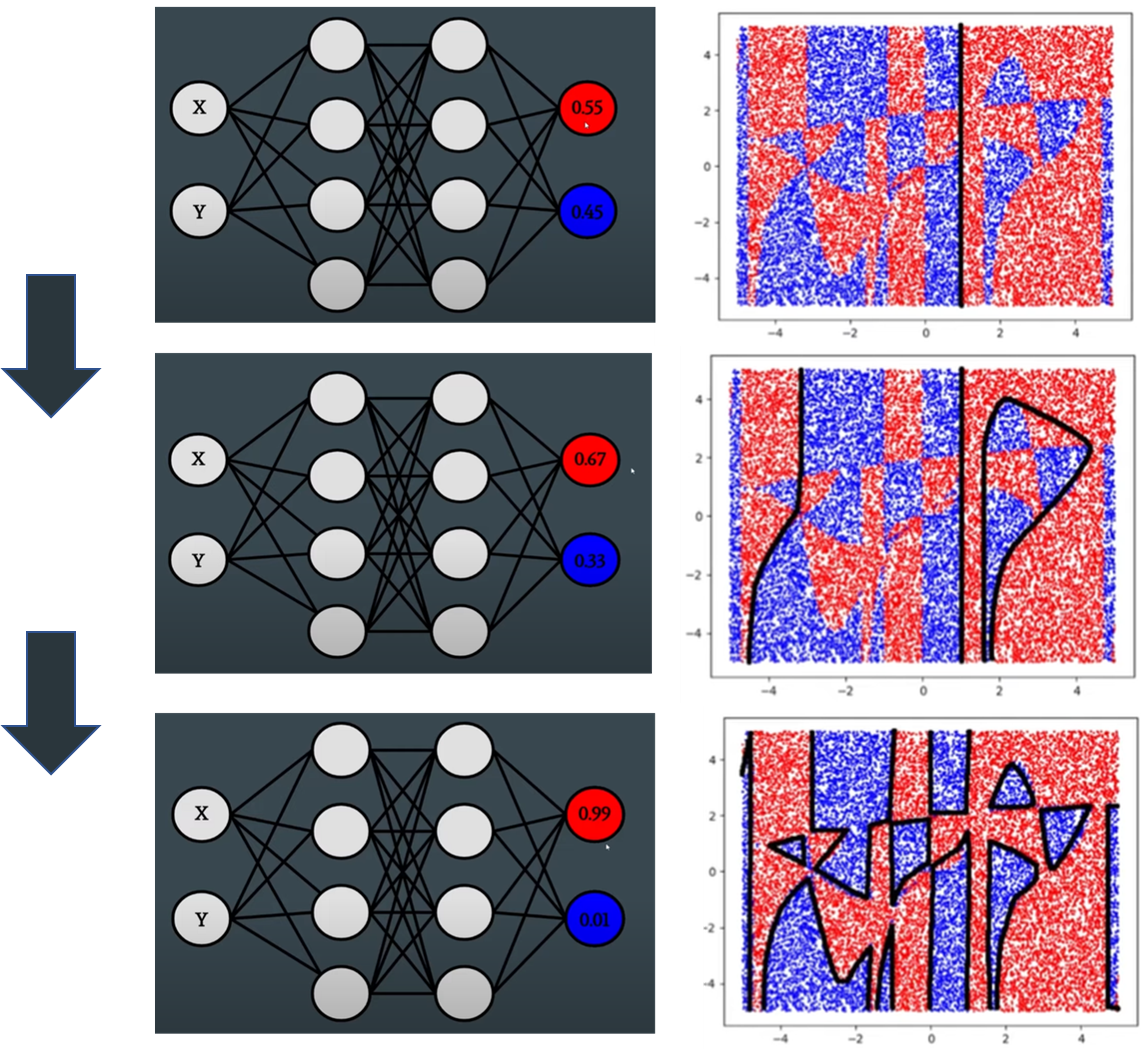

## Hyperparameters ##

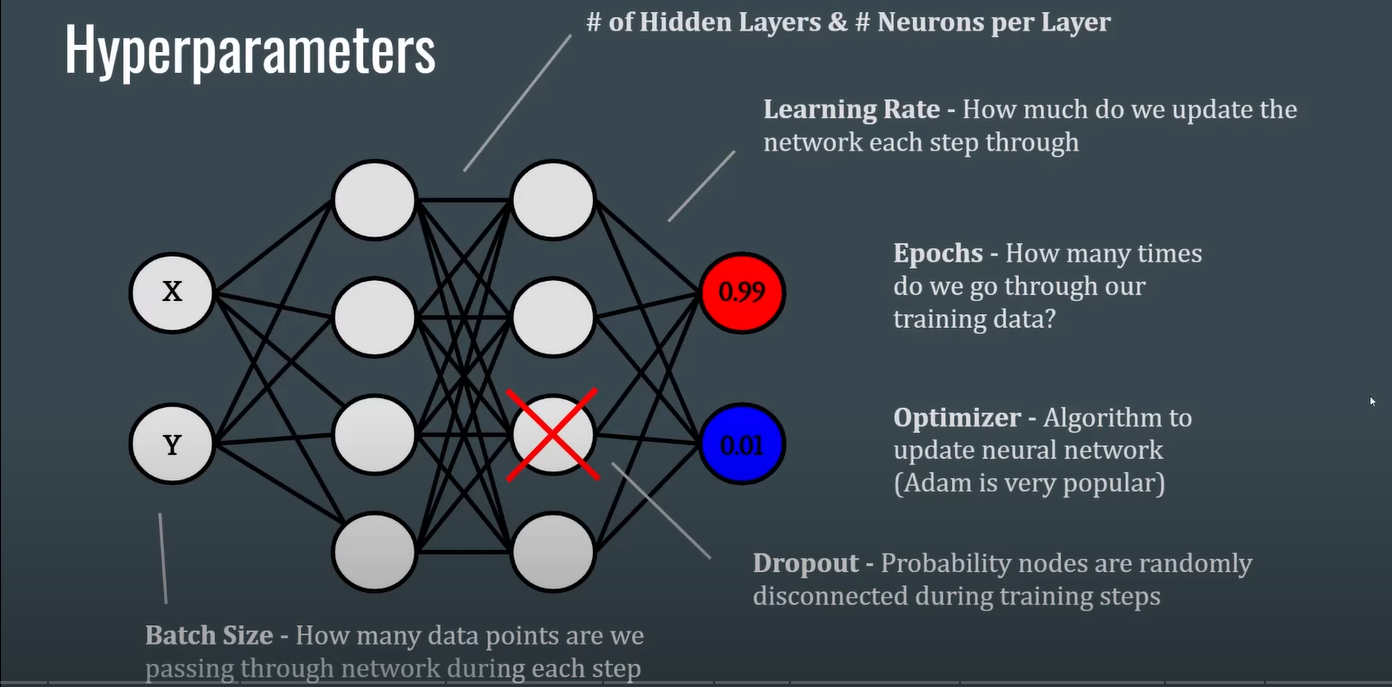

## How do we choose layers, neurons and hyperparameters? ##

- Using training performance (with a validation split) to guide your decisions. 
    - High accuracy on training, but not validation (overfit) -> Reduce the number of parameters. 
    - Low accuracy on training (underfit) -> Increase the number of parameters. 
    
- Automatically search for the best hyperparameters with grid search (learning rate, batch size, optimiser, dropout, etc.)

## Why do we need a activation function? ##

To introduce non-linearity into our neural net calculations (Basically adds complexity to the value output). This allows us to fit more complex data and compute more complex things. 

<img src="content/activationfunction.PNG" alt="Activation Function" width="450px"/>

## Types of Activation functions ## 

<img src="content/AFtypes.PNG" alt="Activation Function Types" width="450px"/>

In hidden layers, ReLU - avoids the vanishing gradient problem and is usually a safe bet. 
In output layers, Softmax functions - good for multi-label classification. 

## Tensorflow/Keras versus PyTorch ## 

**Keras**
- Great for getting started quickly and rapid experimentation. 
- Lacks controls and customisation for more complex programs. 

**Tensorflow** 
- Historically, the most popular framework used in industry. 
- Can be complicated and documentation is not always consistent. 

**PyTorch** 
- Favourite of the research and academic community. 
- Very pythonic syntax, can easily access values throughout the network.  

<h3 style="color: #001a79;">Coding | Tensorflow/Keras</h3>

<hr style="border-top: 1px solid #001a79;" />

## Linear ## 

We will use the red and blue points to train a classifier. 

<table><tr>
<td> <img src="content/linear.PNG" alt="Linear" width="350px"/> </td>
<td> <img src="content/neuralnetwork.PNG" alt="Neural Network" width="350px"/> </td>
</tr></table>

In [2]:
# Import training data. Color 0, 1 is red, blue while x, y are the co-ordiantes
train_df = pd.read_csv('examples/linear/train.csv')

# Shuffle the values
np.random.shuffle(train_df.values)

# Print first 5
train_df

,x,y,color
0,1.650809,0.772986,1.0
1,4.028974,4.924795,0.0
2,2.212241,1.424647,1.0
3,1.332470,2.788767,0.0
4,3.100845,4.181563,0.0
...,...,...,...
3995,1.133395,2.409999,0.0
3996,1.014454,2.198442,0.0
3997,2.589535,3.981220,0.0
3998,4.734692,4.110420,1.0


In [3]:
# Groups x,y and put them into a 2D np array
train_x = np.column_stack((train_df.x.values, train_df.y.values))

# Show first 5 
train_x[0:5]

array([[1.65080865, 0.7729861 ],
       [4.02897359, 4.9247952 ],
       [2.2122406 , 1.4246472 ],
       [1.33246967, 2.78876748],
       [3.10084495, 4.18156283]])

In [4]:
# Puts the color collumn in a np array y
train_y = train_df.color.values

# Show first 5 
train_y[0:5]

array([1., 0., 1., 0., 0.])

In [5]:
# Import test data. 
test_df = pd.read_csv('examples/linear/test.csv')

# Groups x,y and put them into a 2D np array
test_x = np.column_stack((test_df.x.values, test_df.y.values))

# Puts the color collumn in a np array y
test_y = test_df.color.values

test_df

,x,y,color
0,2.684292,3.867108,0.0
1,2.707883,4.002614,0.0
2,2.705905,3.859686,0.0
3,4.536191,5.240051,0.0
4,3.656068,4.461771,0.0
...,...,...,...
995,0.477726,-0.292345,1.0
996,1.847165,1.059756,1.0
997,1.219410,0.123910,1.0
998,0.175419,-1.027707,1.0


The model will have: 
- An x,y input layer like below. 
- One hidden layer instead of the two below. We can adjust the number of neurons to see how the accuracy changes.  
- The same output layer as below. 

<img src="content/neuralnetwork.PNG" alt="Neural Network" width="350px"/> 

In [6]:
# Define number of hidden layer neurons and the batch size
hidden_layer_neurons = 4
batch_number = 4
epochs_number = 2

# See detailed comments below code.
model = keras.Sequential([
    keras.layers.Dense(hidden_layer_neurons, input_shape=(2,), activation='relu'), 
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(train_x, train_y, batch_size = batch_number, epochs = epochs_number)

#print("Evaluation: ")
#model.evaluate(test_x, test_y)
len(train_x)

Epoch 1/2


C:\Users\shane\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1000/1000 [==============================] - 4s 947us/step - loss: 0.4116 - accuracy: 0.8670
Epoch 2/2
1000/1000 [==============================] - 1s 924us/step - loss: 0.0626 - accuracy: 1.0000


4000

**Line by line explanation of the code above:**

model - our neural network

    Sequential - list of the different layers we have in the network.

        First Layer i.e. the hidden layer
            Dense - we want a fully connected, feed foward network.
                hidden_layer_neurons - number neurons in hidden layer
                Input shape - x, y co-ordinates we pass in (1D, 2 parameters).
                activition='relu' - this is a safe bet, when it comes to activation functions.

        Second Layer i.e. the output layer. 
            Dense - we want a fully connected, feed foward network.
                2 - 2 values in output layer, red or blue 
                activation='sigmoid' - common activation function for output layer. 
            
model.compile - compile neural network. 

    optimizer='adam' - this is a safe bet, when it comes to optimisers.
    
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)) - 
    loss function that uses SparseCategoricalCrossentropy which computes the crossentropy loss between the labels and predictions 
    from_logits=True - Logits means the function operates on unscaled output of earlier layers and that the relative scale 
    to understand the units is linear. it means the sum of the inputs may not equal 1, that the values are not 
    propabilities. 
    
    metrics=['accuracy'] - measure the accuracy of the neural network. 

model.fit - fit the training data to our network. 

    x - this is the (x,y) co-oridinates of the points. 
    y - the colors of the points 0 or 1.
    batch_size - how many points are passing through the neural network at each step. 
    Epochs - how many times we go though our training data. 

This is a simple model so by tweeking the hyperparameter we are able to get the accuracy to one quite easily. 

I got 100% accuracy with:
- hidden_layer_neurons = 4
- batch_number = 4
- epochs_number = 2

## Quadratic ## 

We will use the red and blue points to train a classifier. 

<table><tr>
<td> <img src="content/quadratic.PNG" alt="Linear" width="350px"/> </td>
<td> <img src="content/neuralnetwork.PNG" alt="Neural Network" width="350px"/> </td>
</tr></table>

In [7]:
# Import training data. Color 0, 1 is red, blue while x, y are the co-ordiantes
train_q_df = pd.read_csv('examples/quadratic/train.csv')

# Shuffle the values
np.random.shuffle(train_q_df.values)

# Groups x,y and put them into a 2D np array
train_q_x = np.column_stack((train_q_df.x.values, train_q_df.y.values))

# Puts the color collumn in a np array y
train_q_y = train_q_df.color.values

In [8]:
# Import test data. 
test_q_df = pd.read_csv('examples/quadratic/test.csv')

# Groups x,y and put them into a 2D np array
test_q_x = np.column_stack((test_q_df.x.values, test_q_df.y.values))

# Puts the color collumn in a np array y
test_q_y = test_q_df.color.values

In [9]:
# Define number of hidden layer neurons and the batch size
hidden_layer_neurons = 32
batch_number = 4
epochs_number = 12
dropout = 0.2

# Kept code the same as linear but added extra hidden layer and Dropout which is the 
# probability nodes are randomly disconnected during training steps. .2 is a common value to try. 
model_q = keras.Sequential([
    keras.layers.Dense(hidden_layer_neurons, input_shape=(2,), activation='relu'), 
    keras.layers.Dense(hidden_layer_neurons, activation='relu'),
    keras.layers.Dropout(dropout), 
    keras.layers.Dense(2, activation='sigmoid')
])

model_q.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model_q.fit(train_q_x, train_q_y, batch_size = batch_number, epochs = epochs_number)

print("Evaluation: ")
model_q.evaluate(test_q_x, test_q_y)

Epoch 1/12


C:\Users\shane\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1000/1000 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7375
Epoch 2/12
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2991 - accuracy: 0.8873
Epoch 3/12
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1689 - accuracy: 0.9425
Epoch 4/12
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1016 - accuracy: 0.9682
Epoch 5/12
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0664 - accuracy: 0.9805
Epoch 6/12
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0617 - accuracy: 0.9793
Epoch 7/12
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0405 - accuracy: 0.9870
Epoch 8/12
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0265 - accuracy: 0.9942
Epoch 9/12
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0355 - accuracy: 0.9895
Epoch 10/12
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0437 - accurac

[0.007296994794160128, 1.0]

This is model is more complicated so had to tweek the hyperparameters more.

I got 100% accuracy with:

- 2 hidden layers with hidden_layer_neurons = 32
- batch_number = 4
- epochs_number = 12
- dropout = 0.2

## Clusters ## 

This has 6 colours instead of 2. 

<img src="content/clusters.PNG" alt="Linear" width="350px"/>

In [10]:
# Import training data. 
train_c_df = pd.read_csv('examples/clusters/train.csv')

In [11]:
train_c_df.head()

,x,y,color
0,0.129270,1.979720,red
1,-0.380831,1.693519,red
2,0.718693,1.791793,red
3,0.722922,0.620655,red
4,-0.432689,0.541550,red


In [12]:
train_c_df['color'].value_counts()

red       1000
blue      1000
green     1000
teal      1000
orange    1000
purple    1000
Name: color, dtype: int64

Will need to change color names to numbers. 

In [13]:
# Asign codes to colors 
colors = {
    "red": 0, 
    "blue": 1, 
    "green": 2, 
    "teal": 3, 
    "orange": 4, 
    "purple": 5, 
}

In [14]:
# Update df with color codes
for col_name, col_code in colors.items():
    train_c_df['color'] = train_c_df['color'].replace(to_replace = col_name, value = col_code)

In [15]:
train_c_df

,x,y,color
0,0.129270,1.979720,0
1,-0.380831,1.693519,0
2,0.718693,1.791793,0
3,0.722922,0.620655,0
4,-0.432689,0.541550,0
...,...,...,...
5995,0.973060,3.174358,5
5996,-0.894536,2.964002,5
5997,0.426649,3.511122,5
5998,-0.414503,2.712347,5


In [16]:
# Shuffle the values
#np.random.shuffle(train_q_df.values)

# Groups x,y and put them into a 2D np array
train_c_x = np.column_stack((train_c_df.x.values, train_c_df.y.values))

# Puts the color collumn in a np array y
train_c_y = train_c_df.color.values

In [17]:
# Import test data. 
test_c_df = pd.read_csv('examples/clusters/test.csv')

# Update df with color codes
for col_name, col_code in colors.items():
    test_c_df['color'] = test_c_df['color'].replace(to_replace = col_name, value = col_code)

In [18]:
# Groups x,y and put them into a 2D np array
test_c_x = np.column_stack((test_c_df.x.values, test_c_df.y.values))

# Puts the color collumn in a np array y
test_c_y = test_c_df.color.values

In [19]:
# Define number of hidden layer neurons and the batch size
hidden_layer_neurons = 32
batch_number = 4
epochs_number = 12
dropout = 0.2

# Have to update the last layer (output layer from 2 colors to 6) 
model_q = keras.Sequential([
    keras.layers.Dense(hidden_layer_neurons, input_shape=(2,), activation='relu'), 
    keras.layers.Dense(hidden_layer_neurons, activation='relu'),
    keras.layers.Dropout(dropout), 
    keras.layers.Dense(6, activation='sigmoid')
])

model_q.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model_q.fit(train_c_x, train_c_y, batch_size = batch_number, epochs = epochs_number)

print("Evaluation: ")
model_q.evaluate(test_c_x, test_c_y)

Epoch 1/12


C:\Users\shane\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 2s 1ms/step - loss: 0.6590 - accuracy: 0.7477
Epoch 2/12
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2722 - accuracy: 0.8972
Epoch 3/12
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1959 - accuracy: 0.9208
Epoch 4/12
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1660 - accuracy: 0.9333
Epoch 5/12
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1434 - accuracy: 0.9422
Epoch 6/12
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1275 - accuracy: 0.9487
Epoch 7/12
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1185 - accuracy: 0.9538
Epoch 8/12
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1068 - accuracy: 0.9592
Epoch 9/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1050 - accuracy: 0.9590
Epoch 10/12
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0931 - accurac

[0.049299806356430054, 0.9900000095367432]